In [3]:
import pickle
import statsmodels.api as sm
import numpy as np
import json

In [6]:
ep_strat = []

with open('/home/user/github/portfolio-manager/BackTest/model_results/CNNStrategy,strategy_type=equalpercent.json', 'rb') as f:
    for l in f:
        if l.strip():
            ep_strat.append(json.loads(l))

In [7]:
equaldol_strat = []

with open('/home/user/github/portfolio-manager/BackTest/model_results/EqualDollarStrategy.json', 'rb') as f:
    for l in f:
        if l.strip():
            equaldol_strat.append(json.loads(l))

In [36]:
cnn_pvs = [x['pv'] for x in ep_strat]
equaldol_pvs = [x['pv'] for x in equaldol_strat]

In [37]:
cnn_pvs = cnn_pvs[252*3:]
equaldol_pvs = equaldol_pvs[252*3:]

In [38]:
cnn_pvs = np.array(cnn_pvs)
equaldol_pvs = np.array(equaldol_pvs)

In [39]:
cnn_rets = np.log(cnn_pvs[1:]/cnn_pvs[:-1])
equaldol_rets = np.log(equaldol_pvs[1:]/equaldol_pvs[:-1])

In [27]:
equaldol_rets.shape

(2766,)

In [28]:
cnn_rets.shape

(2766,)

In [44]:
equaldol_aug = sm.add_constant(equaldol_rets)
m = sm.OLS(cnn_rets, equaldol_aug).fit()

In [45]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 2.056e+04
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:15:26   Log-Likelihood:                 8818.0
No. Observations:                2263   AIC:                        -1.763e+04
Df Residuals:                    2261   BIC:                        -1.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      2.012      0.044    5.25e-06       0.000
x1             1.0252      0.007    143.387      0.000       1.011       1.039
==============================================================================
Omnibus:                      334.241   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4995.414
Skew:                          -0.024   Prob(JB):                         0.00
Kurtosis:                      10.278   Cond. No.                         69.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
residuals = cnn_rets - equaldol_rets * 1.0252

In [50]:
np.cumsum(residuals)

array([-0.0020484 ,  0.00514857,  0.01136397, ...,  0.46115893,
        0.46466949,  0.47063495])

In [51]:
import matplotlib.pyplot as plt

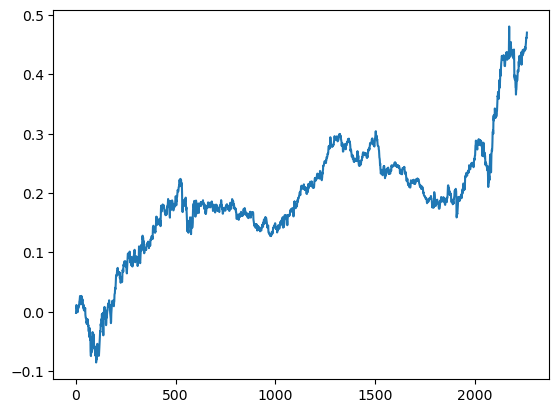

In [52]:
plt.plot(np.cumsum(residuals))

In [53]:
np.exp(0.5)

1.6487212707001282